<a href="https://colab.research.google.com/github/nikeet15/Spam-classifier/blob/self-classifier/Mini_proj_spam_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Basic Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from math import log, sqrt
from wordcloud import WordCloud

# import re
# import sklearn
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix 
# from sklearn.metrics import classification_report 
# from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction import stop_words
# from sklearn.model_selection import train_test_split

# classifiers to be self implemented
# from sklearn.naive_bayes import GaussianNB
# from sklearn import svm
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

import nltk
# nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Uploading spam dataset and converting spam/ham to 1/0

In [21]:
def spam_or_not(s):
  if s == 'ham':
    return 0
  
  elif s == 'spam':
    return 1

df = pd.read_csv('sms-spam.csv', encoding='latin1', usecols=[0, 1], names=['is spam', 'sms'], header=None)[1:]
df['is spam'] = df['is spam'].apply(spam_or_not)

print(df.head())                             #print form top
# df.tail()                                  #print from bottom
# df.info()
print(df['is spam'].value_counts())
print(df.shape)                              #a list at 0th index no. of rows and at 1st index no. of cols

   is spam                                                sms
1        0  Go until jurong point, crazy.. Available only ...
2        0                      Ok lar... Joking wif u oni...
3        1  Free entry in 2 a wkly comp to win FA Cup fina...
4        0  U dun say so early hor... U c already then say...
5        0  Nah I don't think he goes to usf, he lives aro...
0    4825
1     747
Name: is spam, dtype: int64
(5572, 2)


plotting ham vs spam

[]

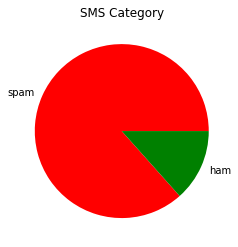

In [22]:
plt.title('SMS Category')
labels = ['spam', 'ham']
sizes = [4825, 747]
colors = ['r', 'g']
plt.pie(x=sizes, labels=labels, colors=colors)
plt.plot()

Adding length column to dataset

In [23]:
df['sms length'] = df['sms'].apply(len)
df.head()
# df.groupby('is spam').describe()

,is spam,sms,sms length
1,0,"Go until jurong point, crazy.. Available only ...",111
2,0,Ok lar... Joking wif u oni...,29
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,0,U dun say so early hor... U c already then say...,49
5,0,"Nah I don't think he goes to usf, he lives aro...",61


plot of no. of spams vs len of spam & no. of ham vs len of ham

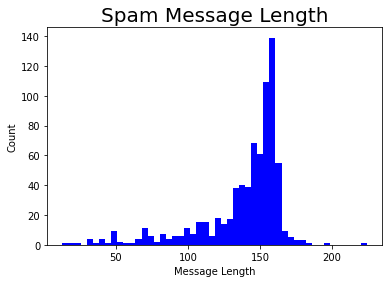

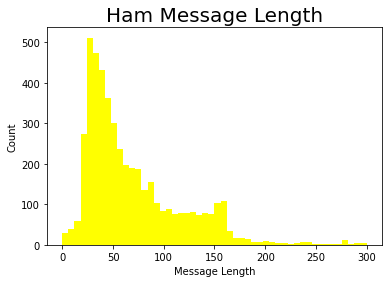

In [24]:
# Plotting length of sms text for spam sms
plt.hist(df[df['is spam']==1]['sms length'],color='blue',bins=50)
plt.title('Spam Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

# Plotting length of sms text for spam sms
plt.hist(df[df['is spam']==0]['sms length'],color='yellow',bins=50,range=(0,300))
plt.title('Ham Message Length',fontsize=20)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


Wordcloud for ham and spam datasets 
giving info of most used words in ham and in spam

The most common ham sms contain words will, know, got, OK, know, Love,now, need.

sms containing words FREE, Please Call, Now , Win, Text,Call tend to be very common spam words

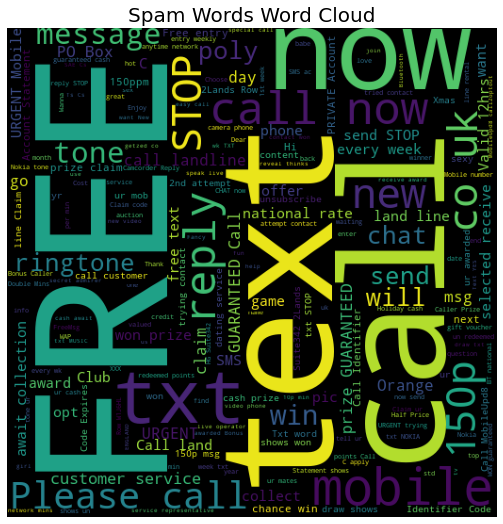

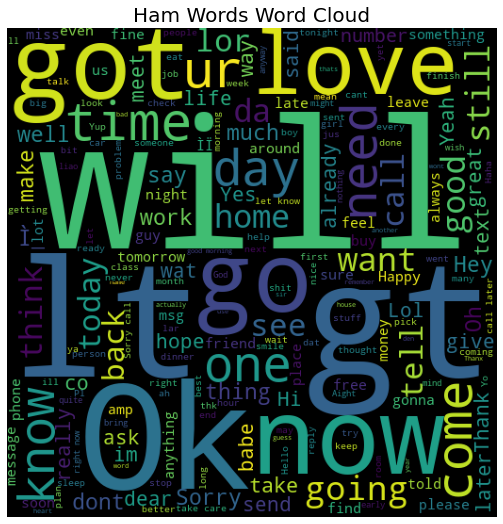

In [25]:
spam_words = ' '.join(list(df[df['is spam'] == 1]['sms']))
spam_wc = WordCloud(width=520,height=520).generate(spam_words)
plt.figure(figsize=(16,9))
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Spam Words Word Cloud",fontsize=20)
plt.show()

ham_words = ' '.join(list(df[df['is spam'] == 0]['sms']))
ham_wc = WordCloud(width=520,height=520).generate(ham_words)
plt.figure(figsize=(16,9))
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Ham Words Word Cloud",fontsize=20)
plt.show()

Split dataset into train(75%) and test data(25%)

In [26]:
totalSMS = 4825 + 747
trainIndex, testIndex = list(), list()
for i in range(df.shape[0]):
  if np.random.uniform(0, 1) < 0.75:
    trainIndex += [i]
  
  else:
    testIndex += [i]

trainData = df.iloc[trainIndex]     # allocating messages at trainIndex[] to trainData 
testData = df.iloc[testIndex]       # allocating messages at testIndex[] to testData

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,is spam,sms,sms length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
trainData['is spam'].value_counts()

0    3577
1     548
Name: is spam, dtype: int64

test data

In [28]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,is spam,sms,sms length
0,1,FreeMsg Hey there darling it's been 3 week's n...,148
1,1,WINNER!! As a valued network customer you have...,158
2,1,Had your mobile 11 months or more? U R entitle...,154
3,0,I'm gonna be home soon and i don't want to tal...,109
4,0,Eh u remember how 2 spell his name... Yes i di...,81


In [29]:
testData['is spam'].value_counts()

0    1248
1     199
Name: is spam, dtype: int64

Further Cleaning of dataset converting messages into tokens and storing term-frequency and inverse-document frequency of each word in a document (ie message)


In [30]:
def process_message(message, gram = 2):
  message = message.lower()
  
  # removing punctuations
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~''' 
  
  for x in message: 
    if x in punctuations: 
      message = message.replace(x, " ") 

  # tokenizing
  words= message.split()                        # array of words.
  # print(words)

  # storing 1 or 2 words together in a token depending on gram
  words = [w for w in words if len(w) > 2]
  if gram > 1:
    w = []
    for i in range(len(words) - gram + 1):
      w += [' '.join(words[i:i + gram])]        # joining 2 words seperated by space
    return w                                    # words like not good get meaning here
  
  # removing most common words with no meaning eg. 'the', 'a', 'is', 'an', etc
  sw = stopwords.words('english')
  words = [word for word in words if word not in sw]
  
  # converting similar words to a general word eg. likes, likable, liking to like
  stemmer = PorterStemmer()
  words = [stemmer.stem(word) for word in words]
  
  return words

Visualization of processed tokens

In [31]:
print(df['sms'][1])
p= process_message(df['sms'][1])
print(p)

# print(df['sms'][2])
# p= process_message(df['sms'][2])
# print(p)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
['until jurong', 'jurong point', 'point crazy', 'crazy available', 'available only', 'only bugis', 'bugis great', 'great world', 'world buffet', 'buffet cine', 'cine there', 'there got', 'got amore', 'amore wat']


Naive Bayes Classifier implementation

In [32]:
class SpamClassifier(object):
  
  def __init__(self, data, method = 'tf-idf'):
    self.sms, self.labels = data['sms'], data['is spam']
    self.method = method

  def train(self):
    self.initialize_TF_IDF()
    
    if self.method == 'tf-idf':
      self.calc_TF_IDF()

    else:
      self.calc_prob()

  def initialize_TF_IDF(self):
    
    noOfMessages = self.sms.shape[0]
    self.spam_sms, self.ham_sms = self.labels.value_counts()[1], self.labels.value_counts()[0]
    self.total_sms = self.spam_sms + self.ham_sms
  
    self.spam_words = 0
    self.ham_words = 0

    self.tf_spam = dict()
    self.tf_ham = dict()
    self.idf_spam = dict()
    self.idf_ham = dict()
      
    for i in range(noOfMessages):
      message_processed = process_message(self.sms[i])
      count = list()  #To keep track of whether the word has ocured in the message or not visited array

      for word in message_processed:
        if self.labels[i]:
          self.tf_spam[word] = self.tf_spam.get(word, 0) + 1      #storing term-frequency of a word
          self.spam_words += 1

        else:
          self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
          self.ham_words += 1

        if word not in count:
          count += [word]
          
        for word in count:
          if self.labels[i]:
            self.idf_spam[word] = self.idf_spam.get(word, 0) + 1   # storing number of times a word appears in a document
                                                                   # ie inverse document frequency
          else:
            self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

  # without TF-IDF to calculate prob.
  def calc_prob(self):
    
    self.prob_spam = dict()
    self.prob_ham = dict()
    
    for word in self.tf_spam:
      self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + len(list(self.tf_spam.keys())))
    for word in self.tf_ham:
      self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + len(list(self.tf_ham.keys())))
    
    self.prob_spam_sms = self.spam_sms / self.total_sms
    self.prob_ham_sms = self.ham_sms / self.total_sms 

  # using TF-IDF to calculate prob.
  def calc_TF_IDF(self):
    
    self.prob_spam = dict()
    self.prob_ham = dict()
    
    self.sum_tf_idf_spam = 0
    self.sum_tf_idf_ham = 0
    
    # prob of a word if it is spam P(A/spam)
    for word in self.tf_spam:
      self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_sms + self.ham_sms) / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
      self.sum_tf_idf_spam += self.prob_spam[word]

    # alpha parameter  
    for word in self.tf_spam:
      self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
    # prob of a word if it is ham P(A/ham)
    for word in self.tf_ham:
      self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_sms + self.ham_sms) / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
      self.sum_tf_idf_ham += self.prob_ham[word]
      
    # alpha parameter
    for word in self.tf_ham:
      self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    # prob of spam P(spam)
    self.prob_spam_sms = self.spam_sms / self.total_sms
    
    #prob of ham P(ham)
    self.prob_ham_sms = self.ham_sms / self.total_sms
                    
  def classify(self, processed_message):
    
    pSpam = 0
    pHam = 0

    for word in processed_message:                
      
      # log(P(A1/spam)) + log(P(A2/spam)) + ..... using log property all gets multiplied inside single log
      if word in self.prob_spam:
        pSpam += log(self.prob_spam[word])

      # alpha parameter in case the word is not present in spam ie math domain error will occur
      else:  
        if self.method == 'tf-idf':
          pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
          
        else:
          pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))

      # log(P(A1/ham)) + log(P(A2/ham)) + ..... using log property all gets multiplied inside single log
      if word in self.prob_ham:
        pHam += log(self.prob_ham[word])
      
      # alpha parameter in case the word is not present in ham ie math domain error will occur
      else:
        if self.method == 'tf-idf':
          pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                
        else:
          pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
              
      # log( P(A1/spam) * P(A2/spam) * .....  * P(spam) )
      pSpam += log(self.prob_spam_sms)
      pHam += log(self.prob_ham_sms)
      
      # pSpam= math.exp(pSpam)
      # pHam= math.exp(pHam)
    
    return pSpam >= pHam
    
  def predict(self, testData):
    result = dict()

    for (i, message) in enumerate(testData):
      processed_message = process_message(message)
      result[i] = int(self.classify(processed_message))
    return result
    

performance metrics

In [33]:
def metrics(labels, predictions):
  true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
  
  for i in range(len(labels)):
    true_pos += int(labels[i] == 1 and predictions[i] == 1)
    true_neg += int(labels[i] == 0 and predictions[i] == 0)
    false_pos += int(labels[i] == 0 and predictions[i] == 1)
    false_neg += int(labels[i] == 1 and predictions[i] == 0)
  
  precision = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)
  Fscore = 2 * precision * recall / (precision + recall)
  accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

  print("[", true_neg, false_pos, "]")
  print("[", false_neg, true_pos, "]")

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F-score: ", Fscore)
  print("Accuracy: ", accuracy)

Applying naive bayes classifier..
using tf-idf model

In [34]:
cl = SpamClassifier(trainData, 'tf-idf')
cl.train()

y_pred = cl.predict(testData['sms'])
metrics(testData['is spam'], y_pred)

[ 1229 19 ]
[ 62 137 ]
Precision:  0.8782051282051282
Recall:  0.6884422110552764
F-score:  0.7718309859154929
Accuracy:  0.9440221147201106


Applying Naive Bayes classiier
without tf-idf less accurate

In [35]:
cl_2 = SpamClassifier(trainData, 'normal')
cl_2.train()

y_pred_2 = cl_2.predict(testData['sms'])
metrics(testData['is spam'], y_pred_2)

[ 1229 19 ]
[ 88 111 ]
Precision:  0.8538461538461538
Recall:  0.5577889447236181
F-score:  0.6747720364741641
Accuracy:  0.9260539046302695
